In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("height.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


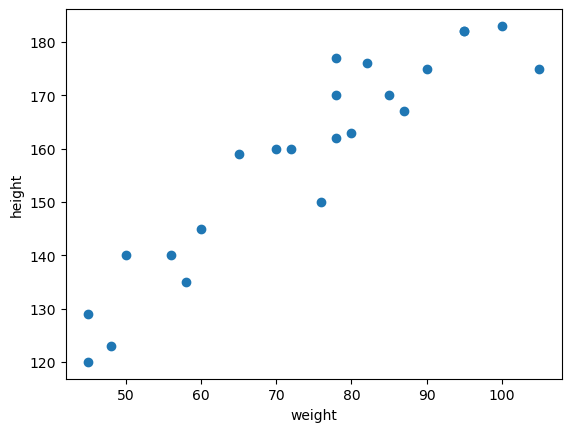

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [13]:
x=df[['Weight']]
y=df['Height']

In [14]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [16]:
#standization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

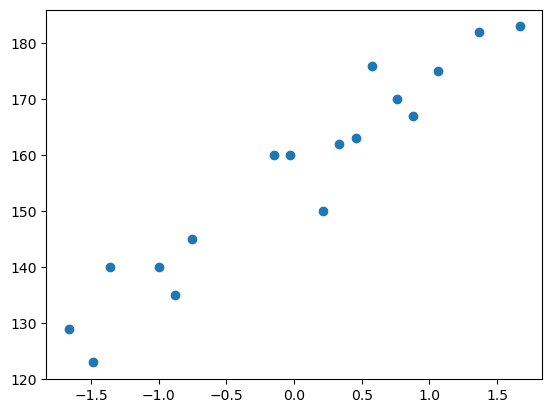

In [17]:
plt.scatter(x_train_scaler,y_train)
plt.show()

In [18]:
#train the simple linear regression model 
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train_scaler,y_train)

LinearRegression()

In [20]:
print('slope of the model',linear.coef_)
print('intercept ',linear.intercept_)

slope of the model [17.2982057]
intercept  156.47058823529412


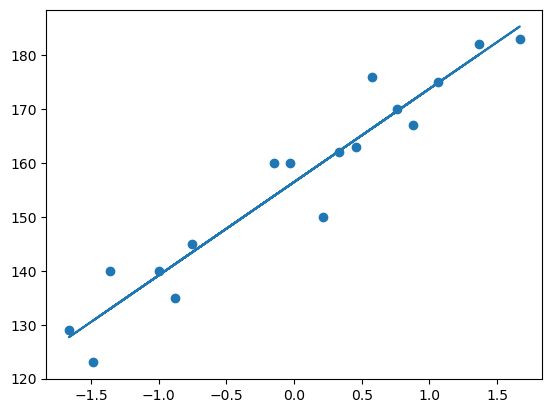

In [25]:
plt.scatter(x_train_scaler,y_train)
plt.plot(x_train_scaler,linear.predict(x_train_scaler))
plt.show()

In [26]:
y_ped=linear.predict(x_test_scaler)


In [30]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_ped)
mqe=mean_squared_error(y_test,y_ped)
rmqe=np.sqrt(mqe)
print(mae)
print(mqe)
print(rmqe)

9.665125886795005
114.84069295228699
10.716374991212605


In [31]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_ped)
print('accuracy',score)

accuracy 0.7360826717981276


In [35]:
#for prediction or when we predicted the height of new data or dataset
scaler_weight=scaler.transform([[80]])
scaler_weight


f:\anacoda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.45613165]])

In [38]:
print('the predicted height for the weight 80kg is :',linear.predict(scaler_weight))

the predicted height for the weight 80kg is : [164.36084726]


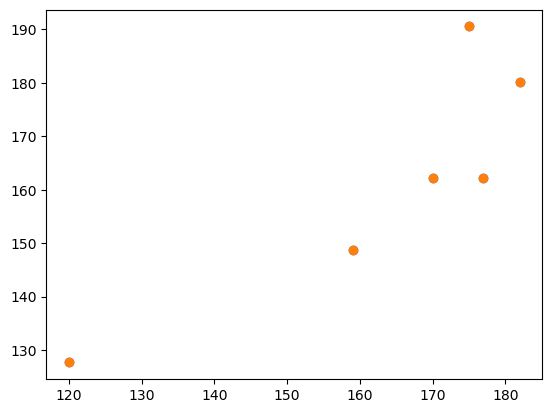

In [41]:
#assumption
#scatter plot for prediction
plt.scatter(y_test,y_ped)
plt.show()

In [42]:
#residuals
residuals=y_test-y_ped
residuals

15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64